In [19]:
# Importi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.datasets import make_regression

Linearna regresija:
-Vaš zadatak za zadaću: implementacija modela linearne regresije
-Primjena tog modela na podatke uz dodarno korištenje različitih alata s kojima smo se upoznali

Zadatak 1. Data exploatory analysis

Model linearne regresije primjeniti ćemo na jednom skupu podataka. Prije toga, potrebno je učitati podatke, upoznati ih i analizirati.

1. Učitavanje podataka

In [2]:
data = pd.read_csv('winequality-white.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


2. Informacije o skupu podataka

Broj podataka, broj varijabli, tip podataka varijabli

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
data.columns, data.dtypes

(Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
        'quality'],
       dtype='object'),
 type                     object
 fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 dtype: object)

3. Analiza svake varijable posebno

Ako je varijabla numerička - dobijemo relevantne kvantitivne mjere poput aritmetičke sredine, medijana i sl.

Varijabla quality unatoč tome što je numerička zapravo predstavlja ocjenu vina, a to je opet neka kategorija koja poprima vrijednosti 1-10. Kod takvi varijabli je upitno koliko će ame ova naliza imati smisla. Ali možemo saznati neke stvari poput toga da je najmanja ocjena 3, a najveća ocjena 9.

In [9]:
data['alcohol'].describe()
data['quality'].describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

4. Analiza svake varijable posebno - grafički

Prethodno izračuate kvantitativne mjere je često zanimljivije vidjeti na grafu - histogram.

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

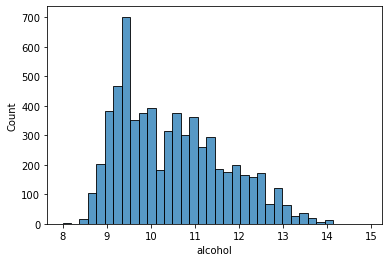

In [10]:
sns.histplot(data['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='Count'>

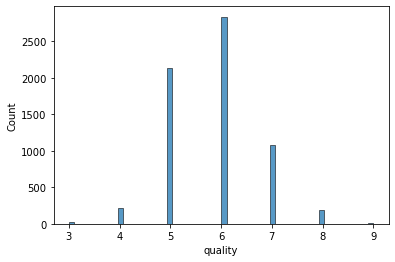

In [11]:
sns.histplot(data, x='quality')

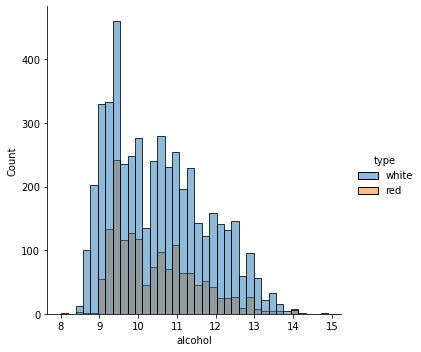

In [13]:
sns.displot(data, x = 'alcohol', hue = 'type')

In [14]:
data['type'].

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

5. Veza između numeričkih varijabli

Postoji li veza između količine alkohola u vinu i gustoće? Količine kiseline i ph-a? Za neke varijable očekujemo da su povezane. Grafički koristeći scatter_plot možemo to ispitati. 

<AxesSubplot:xlabel='alcohol', ylabel='density'>

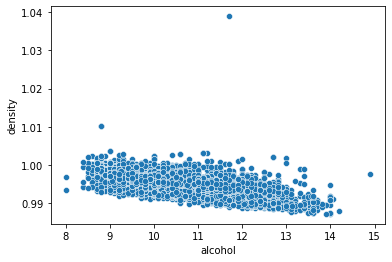

In [15]:
sns.scatterplot(data = data, x = 'alcohol', y = 'density')

<AxesSubplot:xlabel='residual sugar', ylabel='density'>

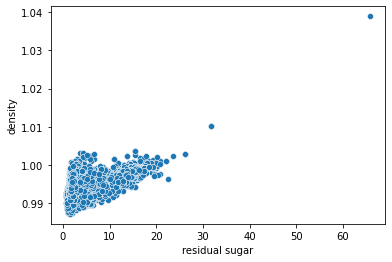

In [16]:
sns.scatterplot(data = data, x = 'residual sugar', y = 'density')


<AxesSubplot:xlabel='pH', ylabel='volatile acidity'>

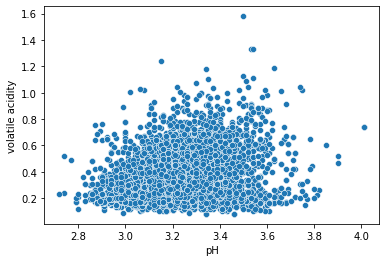

In [17]:
sns.scatterplot(data = data, x = 'pH', y = 'volatile acidity')


6. Veza između svih varijabli

POgledat sve u njenoj biljeznici, jer nismo stigli obraditi na nastavi.

Priprema podataka za treniranje: podjela, obrada.
- uobičajeno je podatke s kojima radimo podijeliti na 2 ili 3 dijela
    - kasnije će biti nešto više o tome rečeno
    - za sada koristimo kao činjenicu da podatke želimo podijeliti na 2 dijela
    - jedan skup podataka (veći) nazvat ćemo trening skup, a drugi skup (manji) testni skup

    -podjela podataka može biti u omjeru npr. trening 70% ,test 30%

    -to možemo napraviti ručno: odabrati koje točno podatke gdje želimo ili nasumično staviti neke podatke
    
    -osim toga možemo korisititi neke funkcije koje to rade
- najjednostavije je korištenje gotovih funkcija iz scikit-learna

In [18]:
# Ručno odaberem


# Provjerimo


# Nasumični odabir


# Korištenje gotove funkcije

Zadatak 3: Upoznavanje modela linearne regresije iz scikit-learna
Model linearne regresije je implementiran kao klasa. Prilikom instanciranja možemo postaviti sljedeće parametre.
-fit_interceptor
    -bool
    -zadano je True
    -određuje treba li računati pomak ili ne
-normalize:
    -bool
    -zadano je False
    -ako je fit_interceptor False, ovaj parametar se ignorira
    -ako je True, podaci su normalizirani tako da se oduzme aritmetička sredina i podijeli sa L2 normom
Nakon što smo postavili model imamo dostupne sljedeće metode

-fit(X,y) treniramo model
-predict(X) vraća predikciju za neki pomak na temelju natreniranih težina
-score(X,y) računa predikcije i uspoređuje sa stvarnim vrijednostima te vraća koeficijent

I atribute:
-coef_
-intercept_

1. Postavljanje i učenje modela

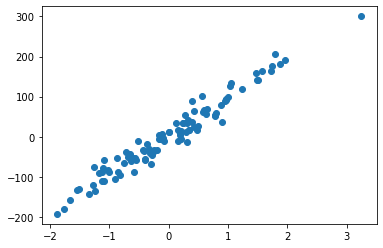

In [30]:
X, y = make_regression(n_samples=100, n_features=1, noise=20) #100 podataka koji imaju 1 svojstvo(featura)
plt.scatter(X,y)
plt.show()

In [31]:
# Klasa
# LinearRegression(*, fit_intecept=True, normalize=False, copy_X = true, n_jobs=None)
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [32]:
lr.predict(X)

array([ -13.85191185, -104.45319894,  -59.8052026 ,   47.99831561,
         31.17790446,   32.29979977,  -78.24416443, -176.23028823,
         -9.45050362,  -21.26799027,  -79.71827197,    2.16625005,
         38.90932306,   55.77736266,   87.53064583,   31.79177139,
        187.32825522,  144.02629144,  179.15199964, -100.5044794 ,
         29.85359937,   -5.2139298 ,   28.57983643,   57.17951135,
       -154.77543451,   41.53413224,  -32.07585501, -116.95800024,
       -108.95638108,  -62.27068495,  166.00846186,   41.95955731,
        308.96118362,   58.68368144,  -38.11918391,  -53.39891447,
        171.47890126,  -11.58622646,  -24.10698908,   93.14774965,
         93.96642838,  142.46408414, -143.91609561,   75.55202966,
       -119.24968362,  -36.32949043,  -28.67674321,  -68.93438896,
       -141.8169596 ,  -13.64877903,   34.19110112,  -49.87246139,
         99.19137347,   20.3774128 ,  100.90916058,   95.80345756,
        -54.14025885,  150.70890395,  -35.88783731,   20.87175

In [33]:
lr.score(X,y)

0.9548439890910477

In [34]:
lr.coef_, lr.intercept_ #theta 1 i theta 0

(array([94.61311212]), 1.8402669768320923)

2. Testiranje modela

In [35]:
pogreska = 0
predikcije = lr.predict(X)
for i,prediction in enumerate(predikcije):
    pogreska += (prediction - y[i])**2
m,n = X.shape
print(pogreska/(2*m))

189.53258531862147


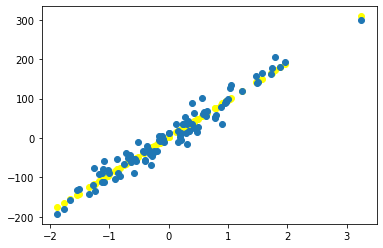

In [38]:
plt.scatter(X, lr.predict(X), color='yellow')
plt.scatter(X,y)
plt.show()